# Supervised classification

In the data.csv there are letters (uppercases and lowercases) and numbers, 28x28 pixels in a row format.

* First, you need to know which labels are which, meaning you need to visualize some data to realize which number labels represents a letter, or a number.

In [48]:
# Import libraries

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import catboost as cat 

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore")

ModuleNotFoundError: No module named 'catboost'

In [3]:
# Your code here

pixel = pd.read_csv('data_all.csv')
pixel.head(25)

,e,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,33.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
pixel['e'].unique()

array([36.,  0.,  3., 33., 30., 24., 40.,  5.,  8.,  2.,  4., 47.,  7.,
       32., 60., 18., 46., 59., 12., 37., 53., 15.,  1.,  9., 38., 43.,
       44., 19., 55.,  6., 58., 41., 20., 29., 28., 31., 42., 39., 25.,
       49., 35., 14., 57., 34., 26., 61., 11., 13., 27., 51., 23., 10.,
       22., 56., 48., 52., 16., 17., 54., 21., 50., 45.])

In [8]:
pixel['e'].value_counts()

1.0     6330
7.0     6139
3.0     5969
2.0     5869
0.0     5778
        ... 
41.0     400
20.0     382
60.0     381
51.0     368
45.0     317
Name: e, Length: 62, dtype: int64

In [4]:
pixels_array= np.array(pixel)
pixels_array

array([[36.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 3.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [28.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 5.,  0.,  0., ...,  0.,  0.,  0.]])

In [5]:
pixels_array.shape

(116322, 785)

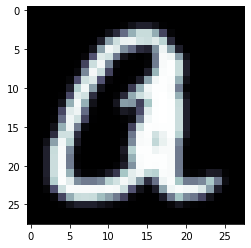

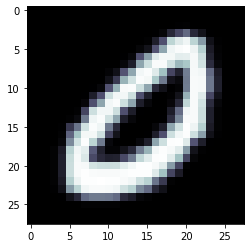

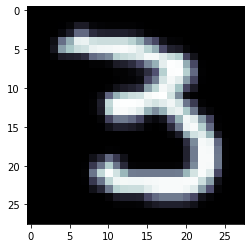

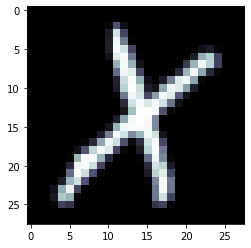

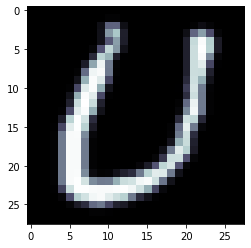

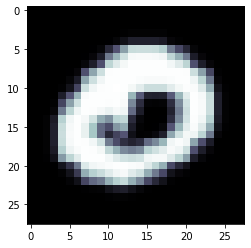

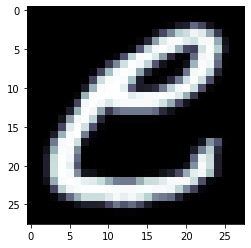

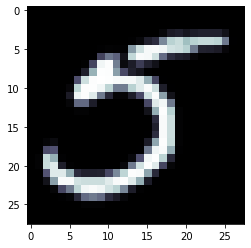

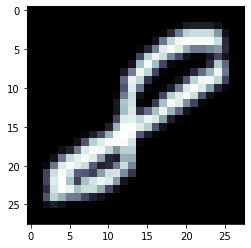

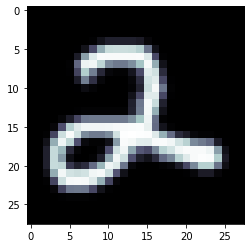

In [6]:
for i in range(10):
    fig, ax= plt.subplots()
    ax.imshow(pixels_array[i,1:].reshape(28,28), cmap=plt.cm.bone,
             interpolation='nearest');

In [ ]:
## Column 'e':

    # 0-9: numbers
    # 10-35: uppercases
    # 36-61: lowercases

* Now, try to train a classifier model to predict the uppercases. Use every single model you know for classification.

* Try to do the same thing with lowercases.

* Try to do the same thing with numbers.

In [9]:
# Your code here
pixel['is_number'] = np.where((pixel['e'] >= 0) & (pixel['e'] <=9),1,0)

In [10]:
pixel['is_uppercase'] = np.where((pixel['e'] >= 10) & (pixel['e'] <=35),1,0)

In [12]:
pixel['is_lowercase'] = np.where((pixel['e'] >= 36) & (pixel['e'] <=61),1,0)

In [13]:
df = pixel.drop('e', axis=1)

**Logistic Regression - Uppercase**

In [14]:
X = df.drop(['is_number','is_uppercase','is_lowercase'], axis=1)
y= df['is_uppercase']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [18]:
log_fit = LogisticRegression()
log_fit.fit(X_train, y_train)

/Users/danser/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [19]:
y_pred = log_fit.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [20]:
classification = pd.DataFrame(y_test)
classification['Predictions'] = y_pred

In [21]:
classification[:10]

,is_uppercase,Predictions
15790,0,0
94811,0,0
102587,1,0
20204,1,0
67102,0,0
25915,0,0
52376,0,0
78957,0,0
40500,0,0
111181,1,1


In [22]:
accuracy_score(y_test, y_pred)

0.7507414571244359

**Logistic Regression - Lowercase**

In [23]:
X = df.drop(['is_number','is_uppercase','is_lowercase'], axis=1)
y= df['is_lowercase']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [25]:
log_fit = LogisticRegression()
log_fit.fit(X_train, y_train)

/Users/danser/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [26]:
y_pred = log_fit.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [27]:
classification = pd.DataFrame(y_test)
classification['Predictions'] = y_pred

In [28]:
classification[:10]

,is_lowercase,Predictions
15790,1,0
94811,0,0
102587,0,0
20204,0,1
67102,1,1
25915,0,0
52376,0,0
78957,1,0
40500,0,0
111181,0,0


In [29]:
accuracy_score(y_test, y_pred)

0.81130453470879

**Logistic Regression - Number**

In [31]:
X = df.drop(['is_number','is_uppercase','is_lowercase'], axis=1)
y= df['is_number']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [33]:
log_fit = LogisticRegression()
log_fit.fit(X_train, y_train)

/Users/danser/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [34]:
y_pred = log_fit.predict(X_test)
y_pred

array([0, 1, 1, ..., 0, 0, 1])

In [35]:
classification = pd.DataFrame(y_test)
classification['Predictions'] = y_pred

In [36]:
classification[:10]

,is_number,Predictions
15790,0,0
94811,1,1
102587,0,1
20204,0,0
67102,0,0
25915,1,1
52376,1,1
78957,0,0
40500,1,0
111181,0,0


In [37]:
accuracy_score(y_test, y_pred)

0.7311411992263056

**KNN - Uppercase**

In [38]:
X = df.drop(['is_number','is_uppercase','is_lowercase'], axis=1)
y= df['is_uppercase']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [42]:
knn_fit = KNeighborsClassifier(n_neighbors=5)
knn_fit.fit(X_train, y_train)

KNeighborsClassifier()

In [45]:
y_pred = knn_fit.predict(X_test)

In [46]:
accuracy_score(y_test, y_pred)

0.8562647754137116

**Decision Tree - Lowercase**

In [65]:
X = df.drop(['is_number','is_uppercase','is_lowercase'], axis=1)
y= df['is_number']

In [66]:
y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [69]:
dt_fit = DecisionTreeClassifier()
dt_fit.fit(X_train, y_train)
y_pr = dt_fit.predict(X_test)

In [70]:
accuracy_score(y_test, y_pr)

ValueError: Found input variables with inconsistent numbers of samples: [4, 23265]

**Random Forest**


In [71]:
random_f = RandomForestClassifier()
random_f.fit(X_train, y_train)

RandomForestClassifier()

In [72]:
y_pred = random_f.predict(X_test)